# Multicollinearity of Features - Lab

## Introduction

In this lab, you'll identify multicollinearity in the Ames Housing dataset.

## Objectives

You will be able to:

* Create a scatter matrix and correlation matrix
* Assess and interpret the output of a correlation matrix
* Identify if variables are exhibiting collinearity
* Decide how to address the collinearity in the data set

## Correlation matrix for the Ames Housing data

### Import data

Let's reimport the Ames Housing data assign the numeric variables we want to keep to `numeric_vars`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

ames = pd.read_csv('ames.csv')

numeric_vars = ['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','LowQualFinSF', 'GrLivArea',
                'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
                'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
                'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                'ScreenPorch', 'PoolArea']

### Create processed
Create a new dataframe named `ames_preprocessed` that contains only the features in `numeric_vars`.

In [2]:
# create single dataframe called ames_preprocessed
ames_preprocessed = ames[numeric_vars].copy()
ames_preprocessed.head()

LotFrontage  LotArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0         65.0     8450         706           0        150          856   
1         80.0     9600         978           0        284         1262   
2         68.0    11250         486           0        434          920   
3         60.0     9550         216           0        540          756   
4         84.0    14260         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  
0              0          0            0         0  
1              0          0            0         0  
2              0          0            0         0  
3            272          0            0         0  
4              0          0            0         0

## Scatter matrix
Create the scatter matrix for the Ames Housing data. This takes a few minutes to load!

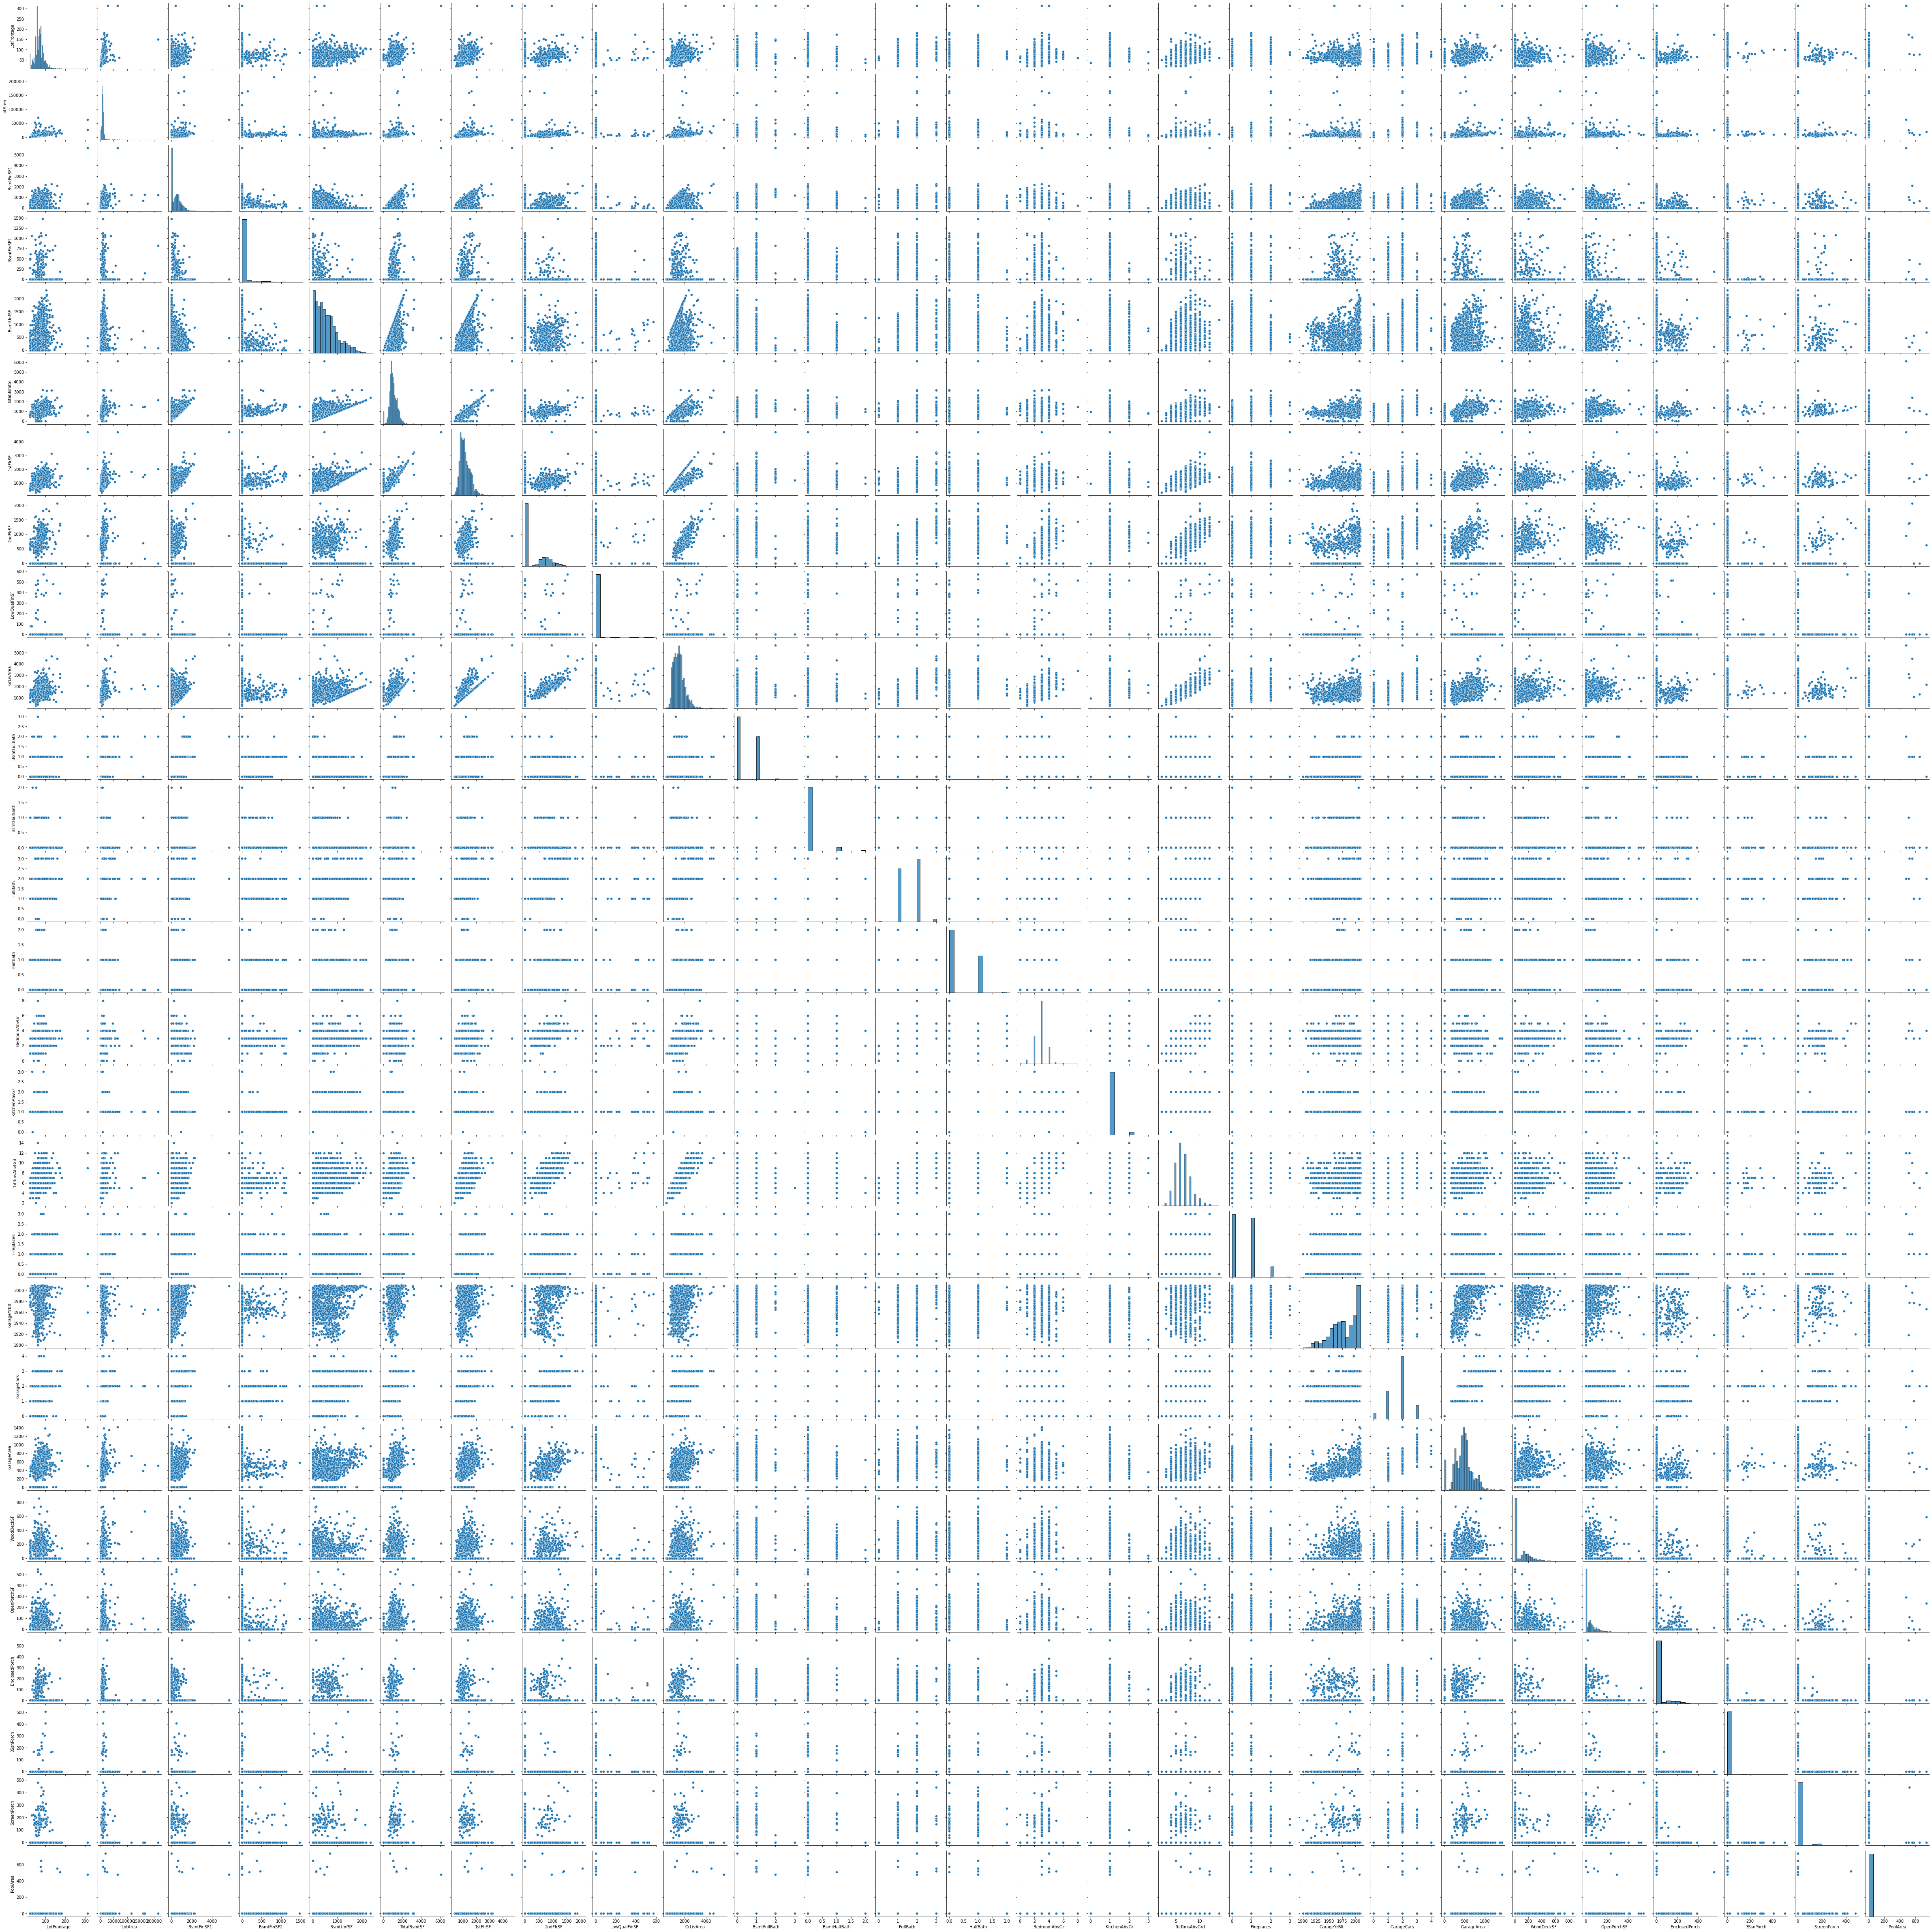

In [3]:
# use pd.plotting.scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter matrix (pairplot) for the numeric variables
sns.pairplot(ames_preprocessed)
plt.show()

The scatter matrix took a while to load and is hard to read. Run the code below to see if adjusting some of the visualization settings helps. 

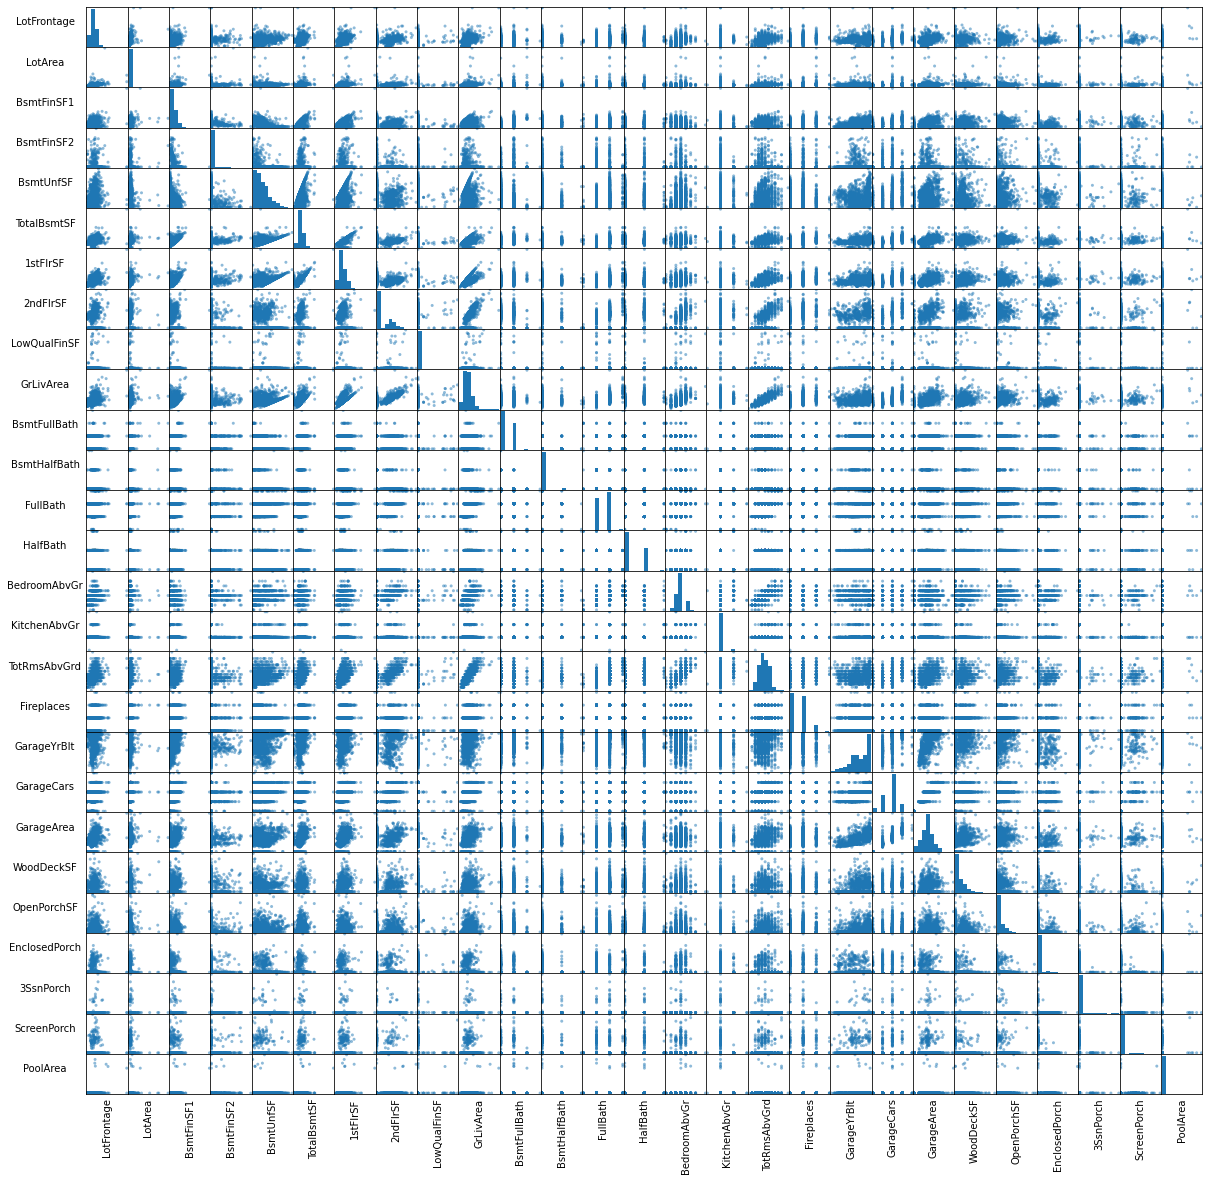

In [4]:
sm = pd.plotting.scatter_matrix(ames_preprocessed, figsize=[20, 20]);

# Rotates the text
[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

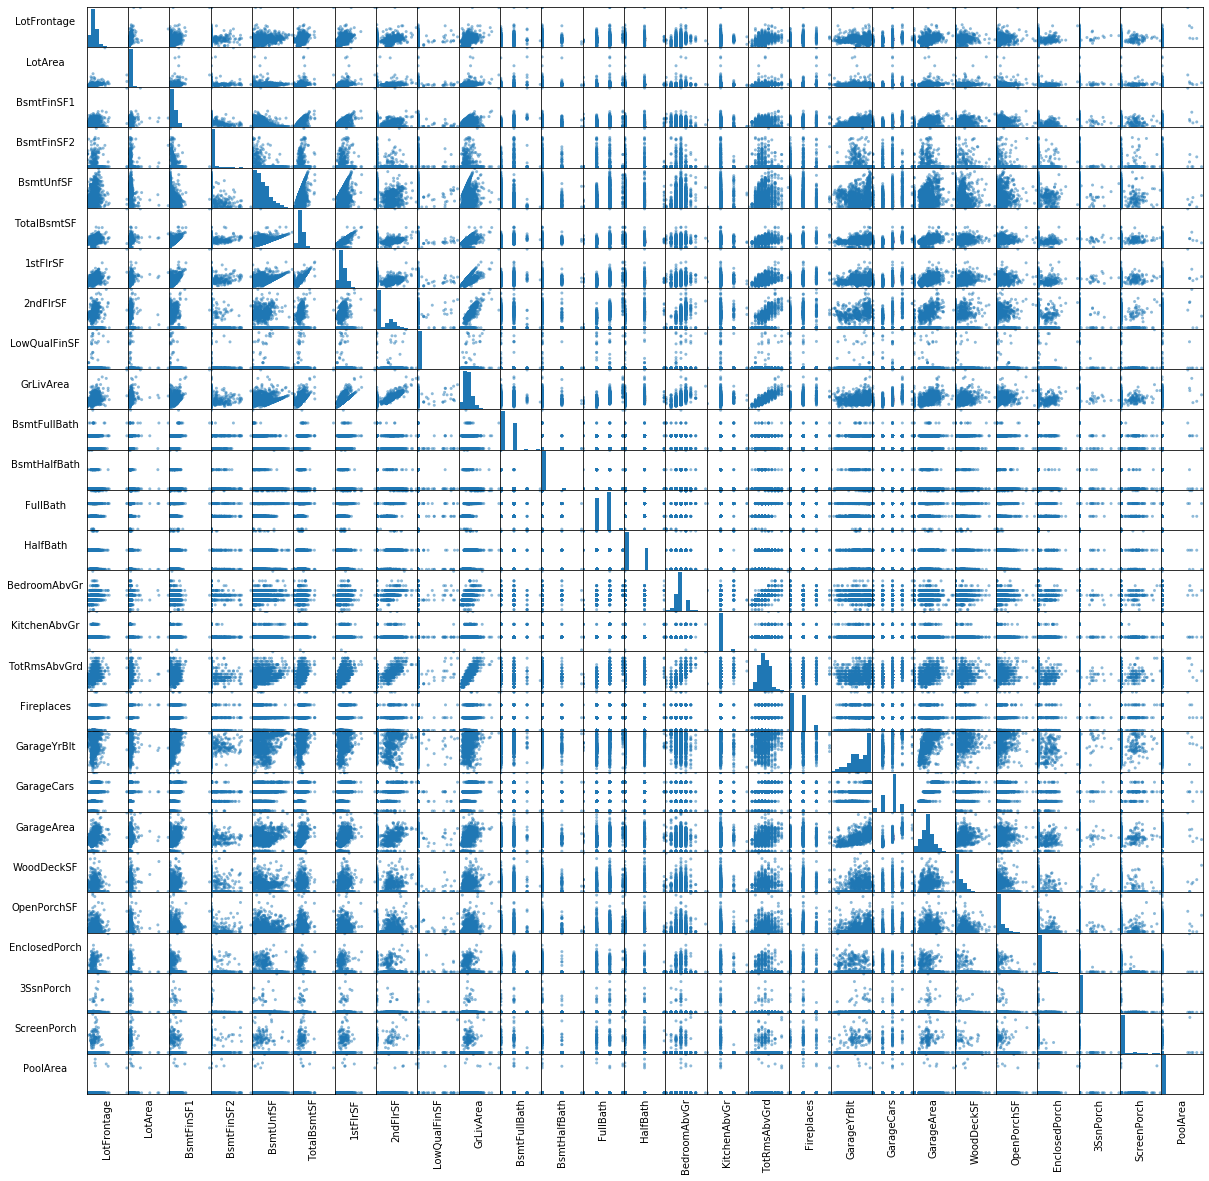

In [4]:
#__Solution__
sm = pd.plotting.scatter_matrix(ames_preprocessed, figsize=[20, 20]);

# Rotates the text
[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

The enhanced plot demonstrates that with larger datasets, scatter matricies become less useful. Through careful examination of the matrix it's clear that `TotRmsAbvGrd` seems correlated with `GrLivArea`, but how easy to use would this matrix if a dataset has hundreds or thousands of variables? Also visual approach to finding correlation cannot be automated, so a numeric approach is a good next step.

## Correlation matrix

Next, create and look at the correlation matrix: 

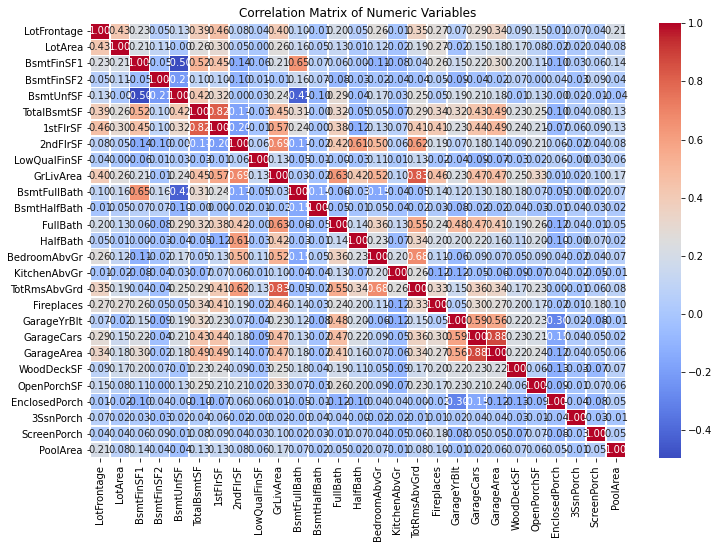

In [5]:
corr_matrix = ames_preprocessed.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Variables")
plt.show()

Return `True` for positive or negative correlations that are bigger than 0.75 in the correlation matrix: 

In [6]:
high_corr = (corr_matrix > 0.75) | (corr_matrix < -0.75)

# Display the result
print(high_corr)

               LotFrontage  LotArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
LotFrontage           True    False       False       False      False   
LotArea              False     True       False       False      False   
BsmtFinSF1           False    False        True       False      False   
BsmtFinSF2           False    False       False        True      False   
BsmtUnfSF            False    False       False       False       True   
TotalBsmtSF          False    False       False       False      False   
1stFlrSF             False    False       False       False      False   
2ndFlrSF             False    False       False       False      False   
LowQualFinSF         False    False       False       False      False   
GrLivArea            False    False       False       False      False   
BsmtFullBath         False    False       False       False      False   
BsmtHalfBath         False    False       False       False      False   
FullBath             False    False   

Now, include `stack` and `zip` to create a more robust solution that will return the variable pairs from the correlation matrix that have correlations over .75, but less than 1. 

In [7]:
# Filter the correlation matrix for values greater than 0.75 but less than 1
high_corr_pairs = corr_matrix[(corr_matrix > 0.75) & (corr_matrix < 1)]

# Stack the correlation matrix to get variable pairs
pairs = high_corr_pairs.stack().reset_index()

# Rename the columns for clarity
pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']

print(pairs)

     Variable 1    Variable 2  Correlation
0   TotalBsmtSF      1stFlrSF     0.819530
1      1stFlrSF   TotalBsmtSF     0.819530
2     GrLivArea  TotRmsAbvGrd     0.825489
3  TotRmsAbvGrd     GrLivArea     0.825489
4    GarageCars    GarageArea     0.882475
5    GarageArea    GarageCars     0.882475


Which varibles are highly correlated in the Ames Housing data set?

# write answer here

TotRmsAbvGrd  and   GrLivArea     0.825489

GarageCars  and  GarageArea     0.882475

GarageArea  and  GarageCars     0.882475

## Make a data decision

Now that you know which variables are correlated with eachother, which would you drop from the dataset?

In [ ]:
# write answer here

In [ ]:
#__SOLUTIOM__
"""
Since three different pairs of variables are highly correlated, the correct approach would be to drop one variable from each pair.

One approach would be to drop Garage Area, Total Rooms, and Total Basement Square Feet.

Garage Area: The size of the garage is dependent on how many cars are in it. If you wanted to still keep the information captured by Garage Area, you could create a new variable "Average space per car" before dropping Garage Area.
Total Rooms: There are other variables that count the number of kitchens, bathrooms, bedrooms, etc. 
Total Basement Square Feet: The first floor of a building is usually built upon the foundation, which contains the basement. To keep the information that there *is* a basement, you could create a variable "HasBasement", when TotalBsmtSF >0, before deleting the original variable. 
"""


## Address the colinearity

Remove the chosen variables from `ames_preprocessed`.

In [8]:
# write code here
# List of variables to remove based on high correlation
variables_to_remove = ['TotRmsAbvGrd', 'GarageArea']  # Example variables chosen to remove

# Drop the variables from ames_preprocessed
ames_preprocessed_cleaned = ames_preprocessed.drop(columns=variables_to_remove)

# Display the cleaned dataframe
ames_preprocessed_cleaned.head()

LotFrontage  LotArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0         65.0     8450         706           0        150          856   
1         80.0     9600         978           0        284         1262   
2         68.0    11250         486           0        434          920   
3         60.0     9550         216           0        540          756   
4         84.0    14260         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageYrBlt  \
0         2         1             3             1           0       2003.0   
1         2         0             3             1           1       1976.0   
2         2         1             3             1           1       2001.0   
3         1         0             3             1           1       1998.0   
4         2         1             4             1           1       2000.0   

   GarageCars  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0           2           0           61              0          0            0   
1           2         298            0              0          0            0   
2           2           0           42              0          0            0   
3           3           0           35            272          0            0   
4           3         192           84              0          0            0   

   PoolArea  
0         0  
1         0  
2         0  
3         0  
4         0

In [9]:
high_corr_pairs = corr_matrix[(corr_matrix > 0.75) & (corr_matrix < 1)]

# Stack the correlation matrix to get variable pairs
pairs = high_corr_pairs.stack().reset_index()

# Rename the columns for clarity
pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Create a list to store the variables we want to drop
variables_to_drop = []

# Iterate over the pairs to decide which variable to remove
for _, row in pairs.iterrows():
    var1, var2 = row['Variable 1'], row['Variable 2']
    # If the variable is not already in the list, add one to drop
    if var1 not in variables_to_drop:
        variables_to_drop.append(var2)  # Arbitrarily choose to drop var2

# Drop the variables from the dataset
ames_preprocessed_cleaned = ames_preprocessed.drop(columns=variables_to_drop)

# Display the cleaned dataframe
ames_preprocessed_cleaned.head()

LotFrontage  LotArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0         65.0     8450         706           0        150          856   
1         80.0     9600         978           0        284         1262   
2         68.0    11250         486           0        434          920   
3         60.0     9550         216           0        540          756   
4         84.0    14260         655           0        490         1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageYrBlt  GarageCars  \
0         1             3             1           0       2003.0           2   
1         0             3             1           1       1976.0           2   
2         1             3             1           1       2001.0           2   
3         0             3             1           1       1998.0           3   
4         1             4             1           1       2000.0           3   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  
0           0           61              0          0            0         0  
1         298            0              0          0            0         0  
2           0           42              0          0            0         0  
3           0           35            272          0            0         0  
4         192           84              0          0            0         0

## Summary
Good job! You got some hands-on practice creating and interpreting a scatter matrix and correlation matrix to identify if variables are collinear in the Ames Housing data set. You also edited the Ames Housing data set so highly correlated variables are removed.